In [1]:
from IPython.display import Image

#### [Python Ver.: 3.6.x] | [Autor: Luis Miguel de la Cruz Salas]

# Aritmética de Punto flotante

- La aritmética que se realiza en una computadora digital es diferente de la que se usa en matemáticas.
    - 2 + 2 = 4
    - $4^2$ = 16
    - $\left(\sqrt{3}\right)^2$ = 3 ?

In [2]:
2 + 2 

4

In [3]:
4**2

16

In [4]:
import math
math.sqrt(3)**2

2.9999999999999996

- En la aritmética continua se permite que un número real pueda tener un número infinito de dígitos.

$$\frac{1}{3} = 0.3333333 \dots 33333 \dots $$

- Una computadora solo puede representar un subconjunto de los números reales, el cual solo contiene números racionales (positivos y negativos).

In [5]:
1/3

0.3333333333333333

In [6]:
format(1/3, '.52f')

'0.3333333333333333148296162562473909929394721984863281'

- Las computadoras cuentan con una cierta capacidad finita para almacenar información. 

- Los números reales se representan mediante los llamados **números de punto flotante** (*floating point numbers*) usando las siguentes características:

    1. Signo **+** o **-** .
    2. Mantisa con $t$ dígitos; donde $t$ es un entero positivo mayor o igual a 1.
    3. Base $\beta$; donde $\beta$ es un entero positivo mayor que 1
    4. Exponente $e$; donde $m \le e \le M$ con $m \le 0$ y $M > t$ <br><br>

- Cada número de punto flotante se representa como:
    $$
    \pm .d_1d_2d_3\dots d_t \times \beta^e
    $$
    donde $0 \le d_i \le \beta - 1 \,\,\, (i= 1,2,3,\dots , t)$
- La forma normalizada ocurre cuando $d_1 \neq 0$

- El número de dígitos en la mantisa es finito, lo que propicia un error en la representación y en las operaciones aritméticas

### Por ejemplo
**IBM 3000 series**

- Sistema numérico de punto flotante (SNPF) de simple precisión: 1 dígito binario (bit) para el signo, 7 bits para el exponente en base 16, y 24 bits para la mantisa.
    - 24 dígitos binarios corresponde a $\approx$ 6 dígitos decimales.
    - El exponente va de 0000000 = 0 a 1111111 = 127. 
    - Para asegurar la representación de números de magnitud pequeña, se resta 64 al exponente, de tal manera que el rango en realidad es de -64 a 63.
    - Por ejemplo:

|Signo|$$e$$|$$t$$|
|---|---|---|
|0|1000010|101100110000010000000000|
| | | |

$$
1000010 = 1 \cdot 2^6 + 0 \cdot 2^5 + 0 \cdot 0^4 + 0 \cdot 2^3 + 
0 \cdot 2^2 + 1 \cdot 2^1 + 0 \cdot 2^0  = 66
\Longrightarrow 16^{66-64}.
$$

$$
\left[
\left(\frac{1}{2}\right)^1 + \left(\frac{1}{2}\right)^3 +
\left(\frac{1}{2}\right)^4 + \left(\frac{1}{2}\right)^7 +
\left(\frac{1}{2}\right)^8 + \left(\frac{1}{2}\right)^{14} 
\right] 16^{66-64} = 179.015625
$$

- En este sistema, el siguiente número más pequeño y el siguiente más grande son:


|0 |1000010 |101100110000001111111111 | = | 179.0156097412109375 |
|---|---|---|---|---|
|0 |1000010 |101100110000010000000001 | = | 179.0156402587890625 |

$$
\Longrightarrow  179.015625 \mbox{ representa } [179.0156097412109375, 179.0156402587890625]
$$

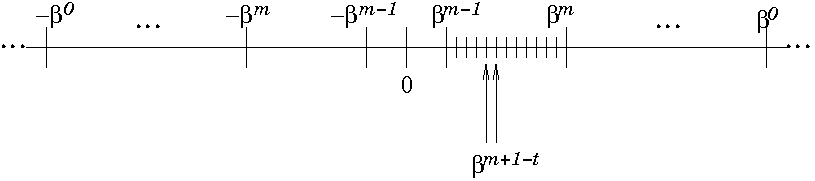

In [7]:
Image(filename='floatingNumbers.png')

- En 1985, el IEEE (Institute for Electrical and Electronic Engineers) publicó: *Binary Floating Point Arithmetic Standard 754, 1985 *.
- Se especifican los formatos para precisión simple, doble y extendida, y esos estándares son usados por muchos constructores de CPUs.

In [8]:
1/10 # El resultado que imprime se ve correcto
     # pero el resultado de la operación es 
     # la fracción binaria representable más cercana
     # al valor correcto.

0.1

In [9]:
format(1/10, '.52f') # Esto da una idea de lo que está almacenado

'0.1000000000000000055511151231257827021181583404541016'

In [10]:
format(0.1, '.52f')

'0.1000000000000000055511151231257827021181583404541016'

In [11]:
format(3602879701896397 / 2 ** 55, '.52f')

'0.1000000000000000055511151231257827021181583404541016'

Observamos que el 0.1 y el $\dfrac{3602879701896397}{2^{55}}$ comparten la misma representación

In [12]:
print(str(math.pi))            # Se redondea el valor real almacenado
print(repr(math.pi))           # para propósitos de despliegue 
print(format(math.pi, '.52f')) # 

3.141592653589793
3.141592653589793
3.1415926535897931159979634685441851615905761718750000


### Ejercicio:
¿Que resultará de las siguientes evaluaciones?:
```python
0.1 == 1/10
0.1 == repr(1/10)
repr(0.1) == 1/10
.1 + .1 + .1
round(.1, 1) + round(.1, 1) + round(.1, 1) == round(.3, 1)
```
Explique el resultado de las evaluaciones.

**Hint**: Checar el valor más aproximado almacenado en memoria usando por ejemplo `format(0.1,'.53f')`

In [13]:
0.1 == 1/10

True

In [14]:
0.1 == repr(1/10) # Por qué esto da como resultado False?

False

In [15]:
repr(0.1) == 1/10 # Por qué esto da como resultado False?

False

In [16]:
0.1 + 0.1 + 0.1 == 0.3

False

In [17]:
round(.1, 1) + round(.1, 1) + round(.1, 1) == round(.3, 1)

False

In [18]:
round(.1 + .1 + .1, 10) == round(.3, 10)

True

## Algunas funciones útiles

In [19]:
x = 3.14159
x.as_integer_ratio() # regresa los enteros usados para 
                     # la representación del número flotante 

(3537115888337719, 1125899906842624)

In [20]:
3537115888337719 / 1125899906842624

3.14159

In [21]:
x.hex() # Convierte el flotante a hexadecimal

'0x1.921f9f01b866ep+1'

In [22]:
float.fromhex('0x1.921f9f01b866ep+1') # convierte el hexadecimal a flotante

3.14159

In [23]:
x == float.fromhex('0x1.921f9f01b866ep+1')

True

El uso de hexadecimales es útil para portabilidad de valores entre diferentes versiones de Python y para el intercambio de información con otros lenguajes.

- Algunas opciones para realizar las operaciones con *más confianza* en los resultados:
    - La función <font color=##009900>**round()**</font>
    - El módulo <font color=##009900>**decimal**</font> 
    - El módulo <font color=##009900>**fractions**<font>

## Round

In [24]:
print("(0.1 + 0.1 + 0.1 == 0.3) ?")
print(round(0.1 + 0.1 + 0.1, 5) == round(0.3, 5))
print(round(10.33333, 3))
print(round(1/3,8))

(0.1 + 0.1 + 0.1 == 0.3) ?
True
10.333
0.33333333


In [25]:
print('{: .3f}'.format(10.34123)) # ¿?

 10.341


## Decimal

In [26]:
from decimal import getcontext, Decimal
from math import pi

print(getcontext())

print('<'+'-'*20+'>')

getcontext().prec = 5
print(Decimal(1)/Decimal(3))

print('<'+'-'*20+'>')

getcontext().prec = 30
print(Decimal(pi))


Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])
<-------------------->
0.33333
<-------------------->
3.141592653589793115997963468544185161590576171875


- <font color=##009900>**getcontext()**</font> permite especificar la precisión y la técnica de redondeo que se usará. 

- Por omisión la técnica es ROUND_HALF_EVEN.


# Fractions

In [27]:
from fractions import Fraction

num1 = Fraction(2,3)
num2 = Fraction(1,3)

print("num1 = {} and num2 = {}".format(num1,num2))

print(num1 + num2)

print(num1 - num2)

print(num1*10)

print(num1/num2)


num1 = 2/3 and num2 = 1/3
1
1/3
20/3
2


## Características del SNPF en Python 3

<font color=##009900>**NumPy**</font> soporta una variedad más amplia de tipos numéricos. 

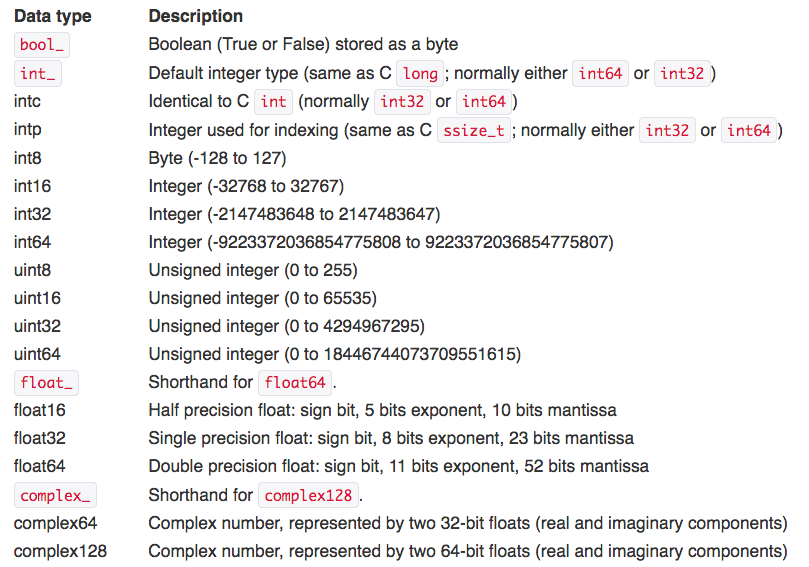

In [28]:
Image(filename='dataTypes.png')

In [29]:
import numpy as np
x = np.float64(0.1)
print(format(x,'.52f'))
print(type(x))

y = np.int_([1,2,4])
print(y)
print(type(y))
print(type(y[1]))

z = np.arange(3, dtype=np.uint8)
print(z)
print(type(z))
print(type(z[0]))

0.1000000000000000055511151231257827021181583404541016
<class 'numpy.float64'>
[1 2 4]
<class 'numpy.ndarray'>
<class 'numpy.int64'>
[0 1 2]
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


In [30]:
xd = math.pi
print(format(xd,'.52f'))
print(type(xd))

xdd = np.float64(xd)
print(format(xdd,'.52f'))
print(type(xdd))

3.1415926535897931159979634685441851615905761718750000
<class 'float'>
3.1415926535897931159979634685441851615905761718750000
<class 'numpy.float64'>


In [31]:
np.finfo(np.float)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [32]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [33]:
np.finfo(np.float64).eps

2.2204460492503131e-16

In [34]:
np.finfo(np.float64).nmant

52

- Para entender esto con mayor detalle véase:
    - http://www.lahey.com/float.htm
    - https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html